In [ ]:
#

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [4]:
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23774 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23159 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


In [6]:
#preprocessing

def process_product_data(df):
    names = []       # Mobile model Name
    varients = []    # Spec
    ratings = []     # Rating they got

    for i in df['Product Name']:
        name = i.split('(')[0].strip()
        names.append(str(name))

        try:                                                         # Used exception handling for index error
            var = i.split('(')[1].strip().split(')')[0]              #  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) =  ['OnePlus Nord CE 2 5G' , "Gray Mirror, 8GB RAM, 128GB Storage)"] = "Gray Mirror, 8GB RAM, 128GB Storage)" "
            varients.append(var)
        except IndexError:
            varients.append('Not Available')

    for i in df['rating']:
        points = i.split()[0]
        ratings.append(float(points))

    df['Product'] = names
    df['Variant'] = varients
    df['Ratings'] = ratings

    df[['Color', 'Ram', 'Rom']] = df['Variant'].str.split(', |\+ ', expand=True)

    # Update the values in the 'Rom' column
    df['Rom'] = df['Rom'].replace('64 GB Storage', '64GB Storage')

    # Remove space in the 'Ram' column for '4GB RAM'
    df['Ram'] = df['Ram'].replace('4GB RAM ', '4GB RAM')

    return df

# Call the function with your dataframe 'df'
df = process_product_data(df)
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Product,Variant,Ratings,Color,Ram,Rom
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",1.0,Gray Mirror,8GB RAM,128GB Storage
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",2.0,Gray Mirror,8GB RAM,128GB Storage
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",5.0,Gray Mirror,8GB RAM,128GB Storage
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",3.0,Gray Mirror,8GB RAM,128GB Storage
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",1.0,Gray Mirror,8GB RAM,128GB Storage


In [7]:

# Dropping un-wanted columns

df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['rating'], axis=1)
df = df.drop(['Product Name'], axis=1)
df = df.drop(['Variant'], axis=1)
df.head()

,Review-Title,Review-Body,Product,Ratings,Color,Ram,Rom
0,Worst phone ever,Hang problem,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,OnePlus Nord CE 2 5G,2.0,Gray Mirror,8GB RAM,128GB Storage
2,Awesome look,Camera is so good n very fast phone back look ...,OnePlus Nord CE 2 5G,5.0,Gray Mirror,8GB RAM,128GB Storage
3,One plus losing is originality!!!,The media could not be loaded.\n ...,OnePlus Nord CE 2 5G,3.0,Gray Mirror,8GB RAM,128GB Storage
4,Read,I got my delivery on 23 feb when I unboxed the...,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage


In [8]:

df['Product'].value_counts()

,count
Product,
Redmi 9 Activ,4460
OPPO A31,4330
Redmi 10 Prime,3768
OnePlus Nord CE 2 5G,3570
Redmi Note 11,2724
realme narzo 50A,2166
vivo iQOO Z6 5G,1419
Samsung Galaxy M32,1340


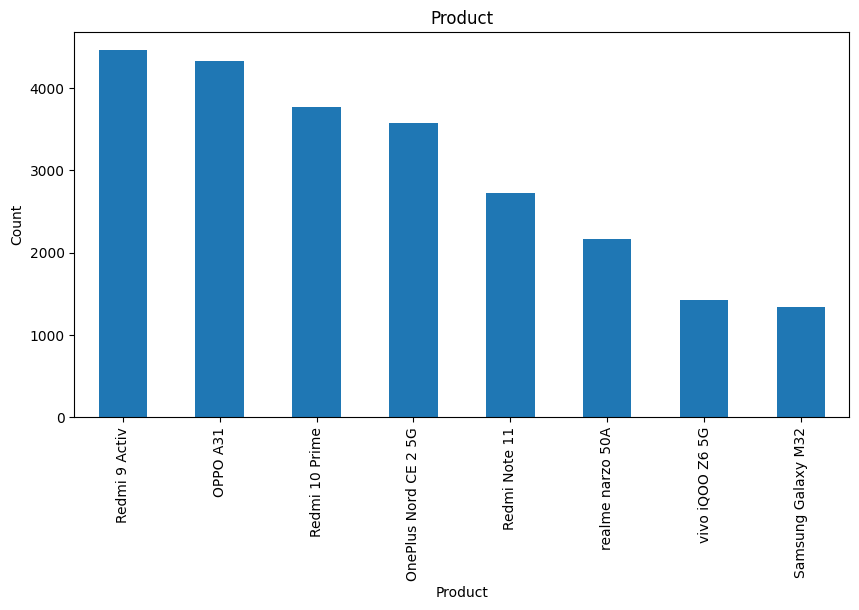

In [9]:
#plot the graph for df['Product'].value_counts()

df['Product'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Product',ylabel='Count',title='Product')
plt.show()

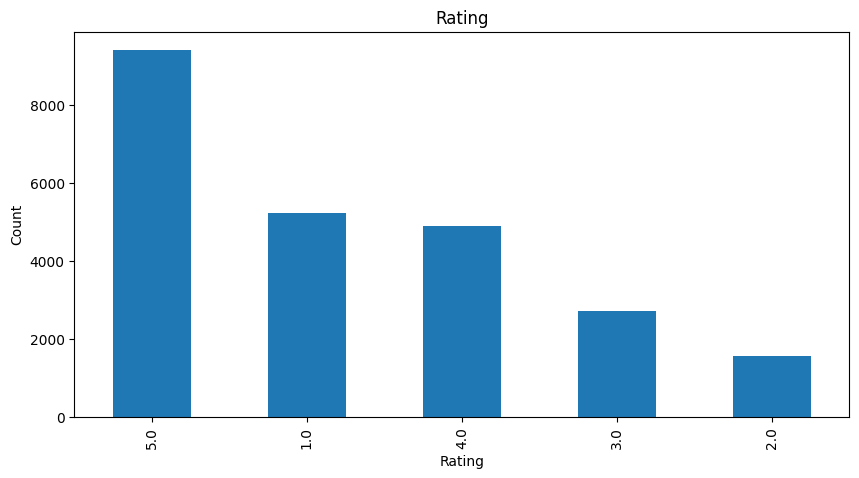

In [10]:
#ploting the rating of the product

df['Ratings'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Rating',ylabel='Count',title='Rating')
plt.show()

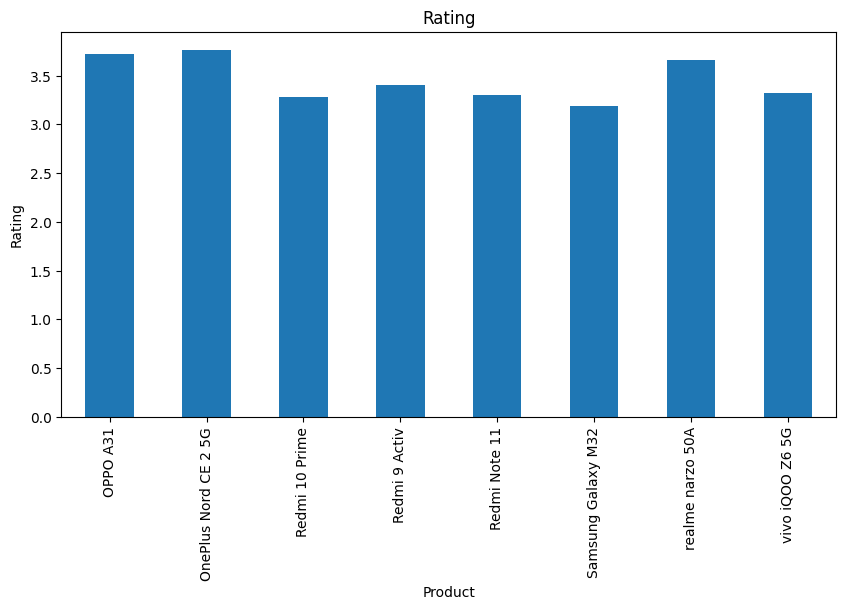

In [11]:
df.groupby('Product')['Ratings'].mean().plot(kind='bar',figsize=(10,5),xlabel='Product',ylabel='Rating',title='Rating')
plt.show()

In [12]:
df['Ram'].value_counts()

,count
Ram,
4GB RAM,9350
6GB RAM,5749
8GB RAM,3570


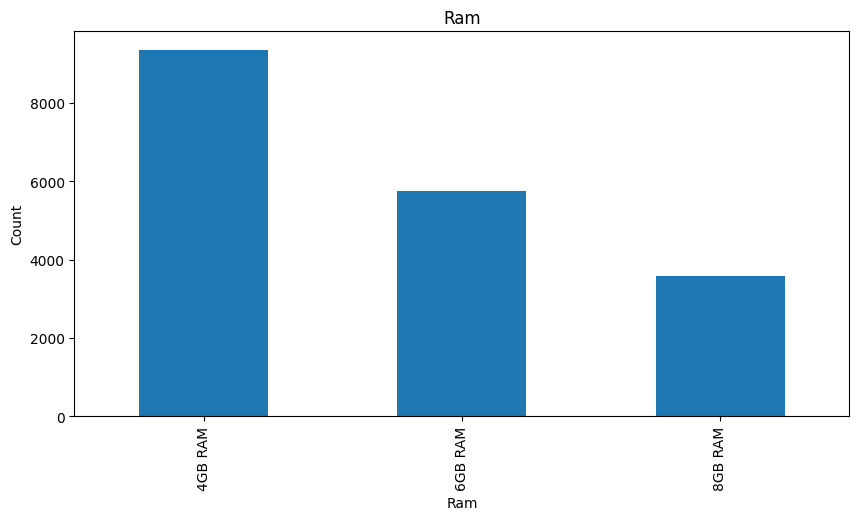

In [13]:
df['Ram'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Ram',ylabel='Count',title='Ram')
plt.show()


In [14]:
df['Rom'].value_counts()

,count
Rom,
64GB Storage,9350
128GB Storage,9319


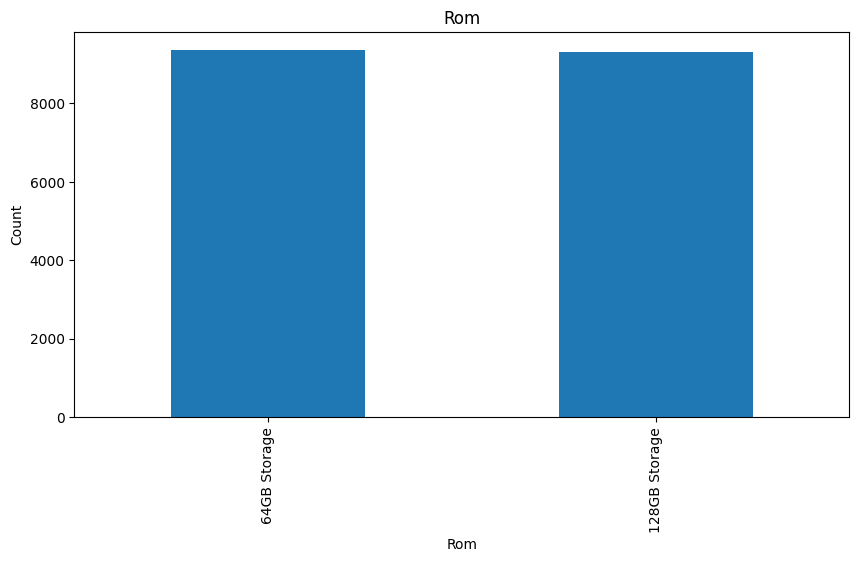

In [15]:
df['Rom'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Rom',ylabel='Count',title='Rom')
plt.show()

In [16]:

df.head()

,Review-Title,Review-Body,Product,Ratings,Color,Ram,Rom
0,Worst phone ever,Hang problem,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,OnePlus Nord CE 2 5G,2.0,Gray Mirror,8GB RAM,128GB Storage
2,Awesome look,Camera is so good n very fast phone back look ...,OnePlus Nord CE 2 5G,5.0,Gray Mirror,8GB RAM,128GB Storage
3,One plus losing is originality!!!,The media could not be loaded.\n ...,OnePlus Nord CE 2 5G,3.0,Gray Mirror,8GB RAM,128GB Storage
4,Read,I got my delivery on 23 feb when I unboxed the...,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage


In [17]:
#NLP

df[['Review-Title', 'Review-Body']]


,Review-Title,Review-Body
0,Worst phone ever,Hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...
2,Awesome look,Camera is so good n very fast phone back look ...
3,One plus losing is originality!!!,The media could not be loaded.\n ...
4,Read,I got my delivery on 23 feb when I unboxed the...
...,...,...
23772,Batten in this rangee,Must he Bhai iss range me bas cemra thoda sa s...
23773,Good mobile,Good product
23774,Good camera,Good
23775,Warest mobile,Don't buy this mobile phone money weast screen...


In [18]:
df['Review-Body'][1]  # See Review in data

"I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery 🔋 backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment"

In [20]:
# SEGEMINTING THE REVIEW

def label_comments(comments):
    labeled_data = []
    for comment in comments:
        if isinstance(comment, str):  # Check if comment is a string
            # Convert the comment to lowercase for case-insensitive matching
            comment_lower = comment.lower()

            # Check for keywords or patterns to assign labels
            if 'battery' in comment_lower:
                label = 'battery'
            elif any(word in comment_lower for word in ['camera', 'video','picture','picture quality']):
                label = 'camera'
            elif 'design' in comment_lower:
                label = 'design'
            elif any(word in comment_lower for word in ['performance', 'hang', 'heat',]):
                label = 'performance'
            elif 'software' in comment_lower:
                label = 'software'
            else:
                label = 'other'
        else:
            label = 'other'  # Assign 'other' label for non-string values

        labeled_data.append((comment, label))
    return labeled_data

# Label the comments automatically
labeled_data = label_comments([str(i) for i in df['Review-Body']])

# Create a DataFrame from the labeled data
df_labeled = pd.DataFrame(labeled_data, columns=['comment', 'label'])






In [21]:
df_labeled.head()

,comment,label
0,Hang problem,performance
1,I'm writing this review after using 3days !!!B...,battery
2,Camera is so good n very fast phone back look ...,battery
3,The media could not be loaded.\n ...,camera
4,I got my delivery on 23 feb when I unboxed the...,camera


In [22]:
# Value counts on labels

df_labeled['label'].value_counts()

,count
label,
other,14458
camera,4028
battery,3640
performance,1490
software,89
design,72


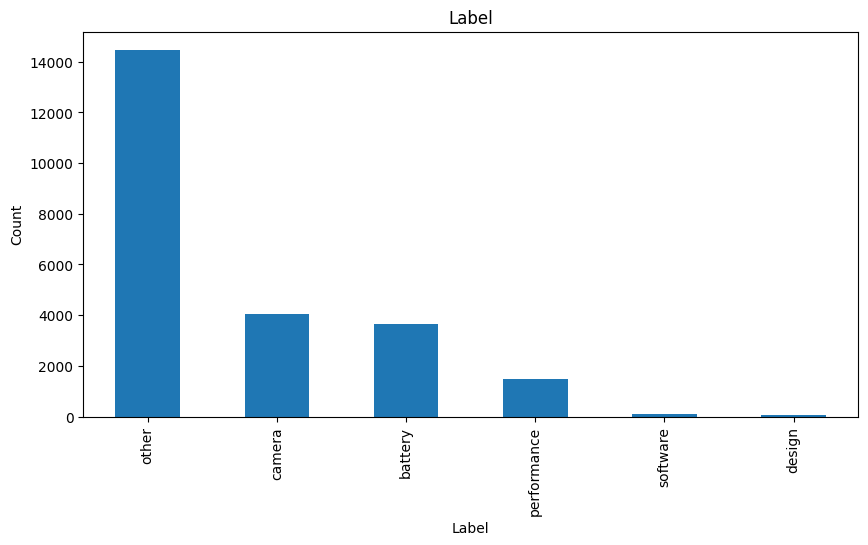

In [23]:
df_labeled['label'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Label',ylabel='Count',title='Label')
plt.show()

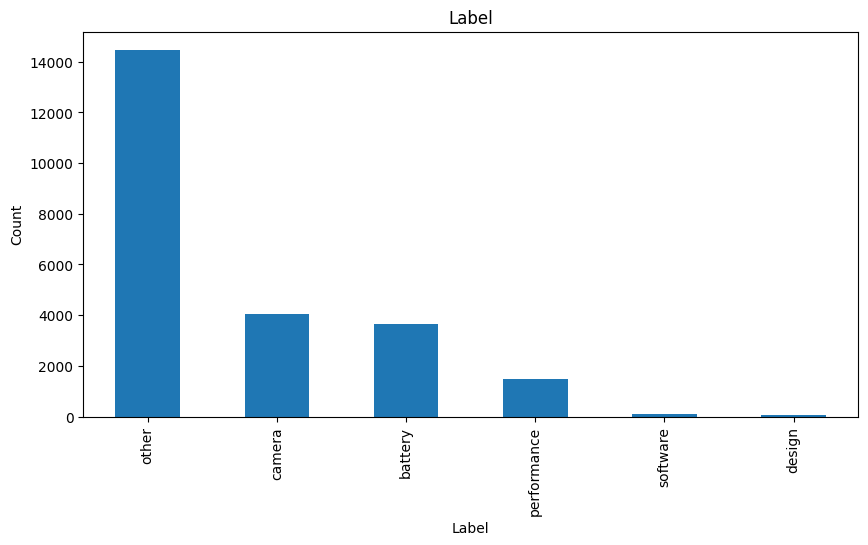

In [24]:
df_labeled['label'].value_counts().plot(kind='bar',figsize=(10,5),xlabel='Label',ylabel='Count',title='Label')
plt.show()

In [25]:
# Stop words identification

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
# Removing Non-Informative Words (Meaningless)

sw = []
for i in df_labeled['comment']:
    words = i.split()
    words = [word for word in words if word not in stopwords]
    sw.append(' '.join(words))

In [30]:
sw[1]


"I'm writing review using 3days !!!Be honest normal Android phoneIt's like OnePlusCamera quality low says 64mp notSound also lowBattery 🔋 backup ok !!! For one day normal use itsIf ur Gamer go itOverall price High handsetIf u really wanna buy OnePlus ho higher end modelI'm first time buying OnePlusLittle disappointment"

In [31]:
# Reducing Words To Their Root Form or Dictionary Form
# Total Documents Length
len(sw)

23777

In [33]:
sw[0]

'Hang problem'

In [32]:
#use Spacy lemmatizer to lemmatize the words

import spacy


In [34]:
# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

lem_word = []

for i in sw:
    doc = nlp(i) # Document  -- longer piece of  text
    lem_word.append([token.lemma_ for token in doc])

In [36]:
# TAGGING EACH WORDS WITH ITS PARTS OF SPEECH

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
import nltk
# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

#part of speech tagging
pos_tag = []

for i in lem_word:
    pos = nltk.pos_tag(i)
    pos_tag.append(pos)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [45]:
pos_tag[1]

[('I', 'PRP'),
 ('be', 'VB'),
 ('write', 'JJ'),
 ('review', 'NN'),
 ('use', 'NN'),
 ('3days', 'CD'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('be', 'VB'),
 ('honest', 'JJS'),
 ('normal', 'JJ'),
 ('Android', 'NNP'),
 ('phoneIt', 'NN'),
 ("'s", 'POS'),
 ('like', 'IN'),
 ('OnePlusCamera', 'NNP'),
 ('quality', 'NN'),
 ('low', 'JJ'),
 ('say', 'VBP'),
 ('64mp', 'CD'),
 ('notsound', 'NN'),
 ('also', 'RB'),
 ('lowbattery', 'VBZ'),
 ('🔋', 'JJ'),
 ('backup', 'NN'),
 ('ok', 'NN'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('for', 'IN'),
 ('one', 'CD'),
 ('day', 'NN'),
 ('normal', 'JJ'),
 ('use', 'NN'),
 ('itsif', 'NN'),
 ('ur', 'JJ'),
 ('Gamer', 'NNP'),
 ('go', 'VBP'),
 ('itOverall', 'JJ'),
 ('price', 'NN'),
 ('High', 'NNP'),
 ('handsetIf', 'NN'),
 ('u', 'NN'),
 ('really', 'RB'),
 ('wanna', 'JJ'),
 ('buy', 'NN'),
 ('OnePlus', 'NNP'),
 ('ho', 'NN'),
 ('high', 'JJ'),
 ('end', 'NN'),
 ("modeli'm", 'NN'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('buy', 'VB'),
 ('OnePlusLittle', 'NNP'),
 ('disappointment', 

In [47]:
import nltk
# Download the required resource: tagsets_json
nltk.download('tagsets_json')
print(nltk.help.upenn_tagset())

[nltk_data] Downloading package tagsets_json to /root/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help/tagsets_json.zip.


In [48]:
 # JOIN All Words Based On Their POS TAG

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [49]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [54]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

chunking = []
for i in lem_word:
    doc = nlp(" ".join(i))  # Create a spaCy Doc object
    chunks = [(chunk.text, chunk.label_) for chunk in doc.noun_chunks]
    chunking.append(chunks)

In [55]:
chunking

[[('problem', 'NP')],
 [('I', 'NP'),
  ('write review use', 'NP'),
  ('normal Android phoneIt', 'NP'),
  ('OnePlusCamera quality', 'NP'),
  ('one day', 'NP'),
  ('normal use', 'NP'),
  ('ur Gamer', 'NP'),
  ('High handsetIf u', 'NP'),
  ('OnePlus ho high end', 'NP'),
  ("modeli'm first time", 'NP'),
  ('OnePlusLittle disappointment', 'NP')],
 [('camera good n fast phone back look', 'NP'),
  ('dis price segment', 'NP'),
  ('I', 'NP'),
  ('dis first one plus phone dedicated slot memory cardbattery backup', 'NP'),
  ('65w charger u', 'NP'),
  ('charger frm Dat u', 'NP'),
  ('phone fastvery', 'NP'),
  ('I', 'NP'),
  ('one photo show download', 'NP'),
  ('11mbps wit cellular networki', 'NP'),
  ('everyone', 'NP'),
  ('dis phone', 'NP'),
  ('oneplus', 'NP'),
  ('good feature', 'NP'),
  ('itThank u oneplus', 'NP'),
  ('Amazon', 'NP')],
 [('the medium', 'NP'),
  ('it', 'NP'),
  ('’ a average product', 'NP'),
  ('decent day day activity', 'NP'),
  ('one thing', 'NP'),
  ('I', 'NP'),
  ('exchang

In [57]:
# Import necessary libraries
from pprint import pprint

# Access the desired element and print using pprint
pprint(chunking[1])

[('I', 'NP'),
 ('write review use', 'NP'),
 ('normal Android phoneIt', 'NP'),
 ('OnePlusCamera quality', 'NP'),
 ('one day', 'NP'),
 ('normal use', 'NP'),
 ('ur Gamer', 'NP'),
 ('High handsetIf u', 'NP'),
 ('OnePlus ho high end', 'NP'),
 ("modeli'm first time", 'NP'),
 ('OnePlusLittle disappointment', 'NP')]


In [59]:
from pprint import pprint

# Print the desired element using pprint
pprint(chunking[3])

[('the medium', 'NP'),
 ('it', 'NP'),
 ('’ a average product', 'NP'),
 ('decent day day activity', 'NP'),
 ('one thing', 'NP'),
 ('I', 'NP'),
 ('exchange', 'NP'),
 ('amazon', 'NP'),
 ('2 3 minute delivery agent', 'NP'),
 ('Good', 'NP'),
 ('I', 'NP'),
 ('poco m2', 'NP'),
 ('pro 6 64 gb variant exchange rupee', 'NP'),
 ('I', 'NP'),
 ('good price', 'NP'),
 ('device', 'NP'),
 ('I', 'NP'),
 ('it', 'NP'),
 ('it', 'NP'),
 ('color', 'NP'),
 ('charger', 'NP'),
 ('VOOC CHARGER', 'NP'),
 ('I', 'NP'),
 ('way', 'NP'),
 ('Fan', 'NP'),
 ('we', 'NP'),
 ('other brand', 'NP'),
 ('originality', 'NP'),
 ('thanx amazon hasselfree exchange alot', 'NP')]


In [60]:
# Numerical  score that quantifies the sentiment or emotional tone of a piece of text (Each review about particular product)

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer  # Tool
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [61]:

POS = sid.polarity_scores(input('Enter a sentence: '))
POS

Enter a sentence: worst college food


{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [62]:
scores = []
for i in chunking:
  word = [str(sent[0]) for sent in i]
  sentence = ' '.join(word)
  polarity_scores= sid.polarity_scores(sentence)   # Calculating polarity scores for every sentences
  scores.append(polarity_scores)


In [63]:
# Compound Score For All Reviews

df_scores = pd.DataFrame(scores)
df_scores

,neg,neu,pos,compound
0,1.000,0.000,0.000,-0.4019
1,0.121,0.879,0.000,-0.5106
2,0.000,0.788,0.212,0.8591
3,0.000,0.777,0.223,0.8591
4,0.164,0.716,0.120,-0.5719
...,...,...,...,...
23772,0.000,1.000,0.000,0.0000
23773,0.000,0.256,0.744,0.4404
23774,0.000,0.000,0.000,0.0000
23775,0.290,0.710,0.000,-0.5994


array([[<Axes: title={'center': 'neg'}>, <Axes: title={'center': 'neu'}>],
       [<Axes: title={'center': 'pos'}>,
        <Axes: title={'center': 'compound'}>]], dtype=object)

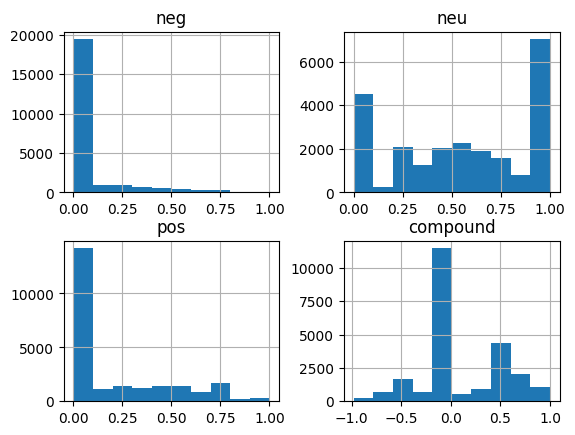

In [64]:

#plot hist for df_scores

df_scores.hist()

In [65]:

df_labeled

,comment,label
0,Hang problem,performance
1,I'm writing this review after using 3days !!!B...,battery
2,Camera is so good n very fast phone back look ...,battery
3,The media could not be loaded.\n ...,camera
4,I got my delivery on 23 feb when I unboxed the...,camera
...,...,...
23772,Must he Bhai iss range me bas cemra thoda sa s...,other
23773,Good product,other
23774,Good,other
23775,Don't buy this mobile phone money weast screen...,battery


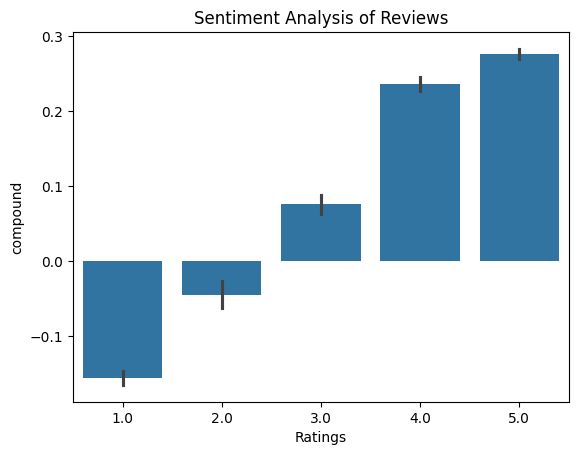

In [66]:
# Adding Features For visuals

df_labeled['Ratings'] = df['Ratings']
df_labeled['compound'] = df_scores['compound']
df_labeled['Product'] = df['Product']


ax = sns.barplot(data=df_labeled, x = 'Ratings', y = 'compound')
ax.set_title('Sentiment Analysis of Reviews')
plt.show()

In [ ]:
 # MEAN COMPARISION BETWEEN SENTIMENT AND ACTUAL RATINGS ON -LABELS-

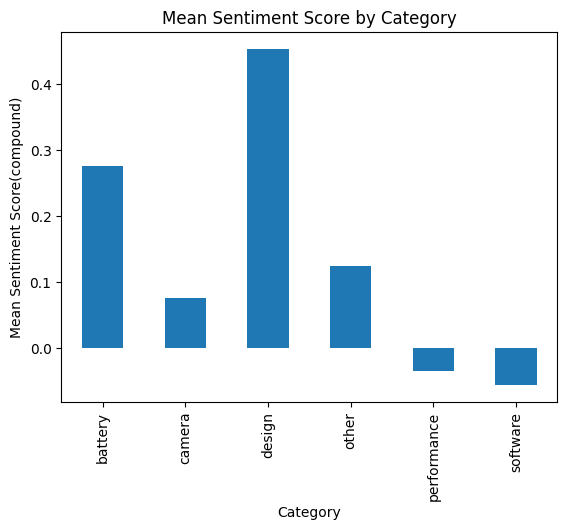

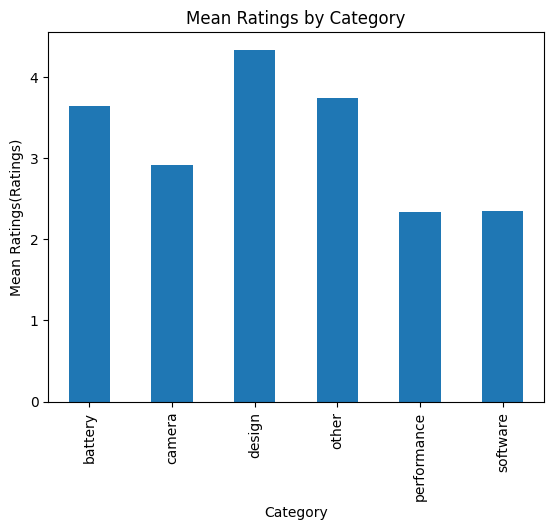

label
battery        3.643681
camera         2.910874
design         4.333333
other          3.735717
performance    2.332215
software       2.348315
Name: Ratings, dtype: float64


In [67]:
mean_sentiment_scores = df_labeled.groupby('label')['compound'].mean()  # Grouped label with value of  compound score

# Calculate mean ratings by category
mean_ratings = df_labeled.groupby('label')['Ratings'].mean()

# Plot bar chart of mean sentiment scores by category
mean_sentiment_scores.plot(kind='bar', xlabel='Category', ylabel='Mean Sentiment Score(compound)', title='Mean Sentiment Score by Category')
plt.show()

mean_ratings.plot(kind='bar', xlabel='Category', ylabel='Mean Ratings(Ratings)', title='Mean Ratings by Category')
plt.show()

# Print mean ratings by category
print(mean_ratings)

In [68]:
# RESULT

df

,Review-Title,Review-Body,Product,Ratings,Color,Ram,Rom
0,Worst phone ever,Hang problem,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,OnePlus Nord CE 2 5G,2.0,Gray Mirror,8GB RAM,128GB Storage
2,Awesome look,Camera is so good n very fast phone back look ...,OnePlus Nord CE 2 5G,5.0,Gray Mirror,8GB RAM,128GB Storage
3,One plus losing is originality!!!,The media could not be loaded.\n ...,OnePlus Nord CE 2 5G,3.0,Gray Mirror,8GB RAM,128GB Storage
4,Read,I got my delivery on 23 feb when I unboxed the...,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
...,...,...,...,...,...,...,...
23772,Batten in this rangee,Must he Bhai iss range me bas cemra thoda sa s...,vivo iQOO Z6 5G,4.0,Chromatic Blue,6GB RAM,128GB Storage
23773,Good mobile,Good product,vivo iQOO Z6 5G,4.0,Chromatic Blue,6GB RAM,128GB Storage
23774,Good camera,Good,vivo iQOO Z6 5G,5.0,Chromatic Blue,6GB RAM,128GB Storage
23775,Warest mobile,Don't buy this mobile phone money weast screen...,vivo iQOO Z6 5G,1.0,Chromatic Blue,6GB RAM,128GB Storage


In [69]:
df_labeled['Product'] = df['Product']


df_labeled['compound'] = df_scores['compound']


df_labeled['Ratings'] = df['Ratings']


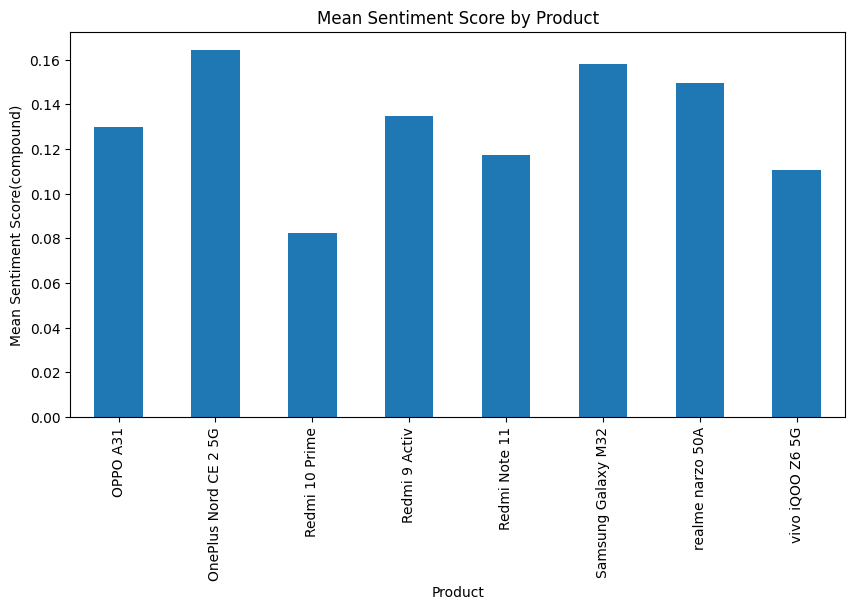

Product
OnePlus Nord CE 2 5G    0.164265
Samsung Galaxy M32      0.158116
realme narzo 50A        0.149503
Redmi 9 Activ           0.134724
OPPO A31                0.129869
Redmi Note 11           0.117517
vivo iQOO Z6 5G         0.110594
Redmi 10 Prime          0.082453
Name: compound, dtype: float64


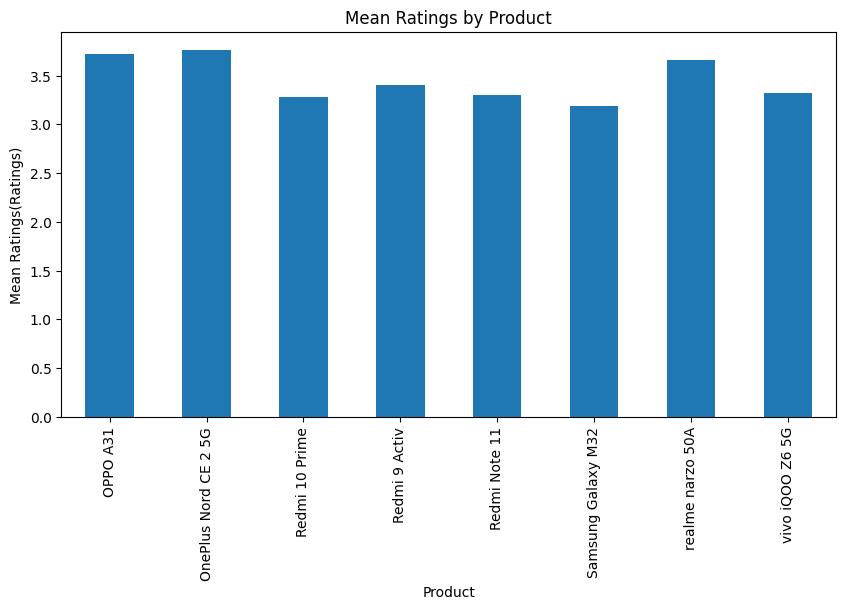

Product
OnePlus Nord CE 2 5G    3.760224
OPPO A31                3.727021
realme narzo 50A        3.664820
Redmi 9 Activ           3.400897
vivo iQOO Z6 5G         3.321353
Redmi Note 11           3.303598
Redmi 10 Prime          3.277070
Samsung Galaxy M32      3.184328
Name: Ratings, dtype: float64


In [70]:
# MEAN COMPARISION BETWEEN SENTIMENT AND RATINGS ON -PRODUCTS-

#plot by product

prod_comp = df_labeled.groupby('Product')['compound'].mean()

prod_comp.plot(kind='bar',figsize=(10,5),xlabel='Product',ylabel='Mean Sentiment Score(compound)',title='Mean Sentiment Score by Product')
plt.show()

print(prod_comp.sort_values(ascending=False))


prod_rating = df_labeled.groupby('Product')['Ratings'].mean()

prod_rating.plot(kind='bar',figsize=(10,5),xlabel='Product',ylabel='Mean Ratings(Ratings)',title='Mean Ratings by Product')
plt.show()

print(prod_rating.sort_values(ascending=False))